In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *

from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
%matplotlib inline

In [3]:
challenge_number = 6
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

sca = sanitise(ca)
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

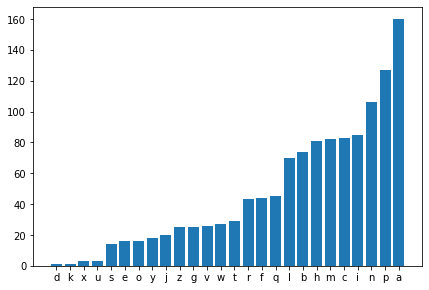

In [6]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [7]:
(kworda, kwrapa), score = keyword_break_mp(sca, fitness=Ptrigrams)
kworda, kwrapa

('norway', <KeywordWrapAlphabet.from_last: 2>)

In [10]:
pa = cat(reversed(keyword_decipher(sca, kworda, kwrapa)))
print(pa)

harryiguessyouhaveheardbynowabouttheinvasionithascomeasnoshocktoanyonethebritishhadbeenopenlydiscussingacountermanoeuvreandthatisnowasignificantpartofthenazipropagandatheofficiallineisthewehrmachtaretheretoprotectthecountrysneutralityagainstfrancobritishaggressiontheattachedinvasionorderswereinterceptedbybossagentsinthecapitalwhohaveestablishedaheadquartersnexttothetelephoneexchangeasfaraswecantelltheirtapintothesecuretelegraphicsystemhasnotyetbeendetectedbutwewillneedtolookoutforfakeintelligenceincasethatchangesunsurprisinglytheordersusethemostsecurecipherwehaveseenyetacolumnartranspositionluckilyihadsomeideawhattolookforsincenorskhydrowasanimportanttargetforthereichserziehungsministeriumandthatgavemeabigcluethemessagemakesmeverygladthatmonsieurallierwasabletoevacuatetheheavywaternowthatthesshavetakencontrolofrjukanitisonlyamatteroftimeuntiltheybuilduptheirownstocksbutthatwilltakeawhileandwecanusethatperiodtoworkoutwhattodonextwewillberelyingheavilyonyournetworkinthecountrytofeeduswit

In [11]:
fpa = lcat(tpack(segment(pa)))
print(fpa)

harry i guess you have heard by now about the invasion it has come as no shock to anyone the british
had been openly discussing a counter manoeuvre and that is now a significant part of the nazi
propaganda the official line is the wehrmacht are there to protect the country s neutrality against
franco british aggression the attached invasion orders were intercepted by boss agents in the
capital who have established a headquarters next to the telephone exchange as far as we can tell
their tap into the secure telegraphic system has not yet been detected but we will need to lookout
for fake intelligence in case that changes unsurprisingly the orders use the most secure cipher we
have seen yet a columnar transposition luckily i had some idea what to look for since norsk hydro
was an important target for the reichs erziehung s ministerium and that gave me a big clue the
message makes me very glad that monsieur allier was able to evacuate the heavy water now that the ss
have taken control of 

In [12]:
open(plaintext_a_filename, 'w').write(fpa)

1501

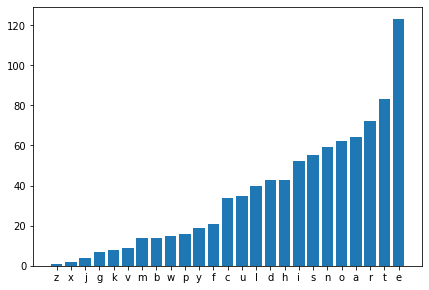

In [13]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [14]:
rscb = cat(reversed(cb))
rscb

'\nTRSXS EYHHN LASOR ILHRN NZCHT LYRON AEHSN UIPCN EOLDO ADPNC TRHRS ATORS ONAWT EETDD RYTNO DBEIF INCTR MIEOT ASSGR TRDPE SVBHL OAHEE ACMCE OMLTE RLEFY AYOFS OTAEN REAEO ENBAS OTEVA ENRNN UVJIE NTARL EEMID ATTOD ITRUE UDRRI FRAEB FHDHH UWUSS ESRCC UESEE NVAIE SATSI ACOSA AOENI AWTED OEIHN RELEU IENUR NICNR YEYCT ITDTS TELRY FOAOF WNAAC YSUNE HAVTL STRAU SBDRT TATTT RSHOS KEHHU DLDRE OESOC SIDHE HEEHT SCLNE ENEAE BANVT INSRL PJASH HIEIH TTTUI TRRUN LWEIU RITNI TAHUL BFSAC TENER LONRE IOILH HTUTS ASDRL OTSES REREE LRARN ARLEH OOCPE DBHAE KDRUN EEDRD RDSPP ETLWE NUYDN TEABA IHFRF HNOSP OYRAO PTCTD AMEIF ENENV UEERF IBTHO IMOAG DOSYF NXFRC KPHOE ETMOO EDLFN RTSFO IIGIH EALOR UDCEA TDRSL ETSCI TLPER UOWME ISNIP OKFTK IHCAH OGAUA DUELF TANWA EOONH UEVOT UHYTU LDEEE OAWTE ADLES IRTUL ETEIF ASCDR TISAR TWJEL EPRDL STRAL ECBGU WENEE AICTN HMNDM OINHY REASO RSGTC YNTIU REWSE EFRIM TMHEE TOWSE RDPEF TDENH ODLEP ATRVT TLCEY CINRT YOOCL SRSAC AMDNE DGURP IHTIL ETHLD SWHCR UOEDC NUEUL TRERE OOBAC N

In [15]:
(kwordb, fillb, emptyb), score = column_transposition_break_mp(scb, fitness=Ptrigrams)
(kwordb, fillb, emptyb), score

(((3, 1, 4, 2, 0), False, True), -3026.420927215971)

In [16]:
pb = column_transposition_decipher(scb, kwordb, fillcolumnwise=fillb, emptycolumnwise=emptyb)
pb

'uranprojektspecialordersforsixtyninthinfantrydivisioncommandedbygeneralmajorhermanntitteloncetheinitialobjectivesofunternehmenweseruebunghavebeenachievedanelitetaskforceistobeassembledandorderedtoproceedatallspeedtorjukanwheretheyaretotakepossessionofthenorskhydrofactorystaffatthefacilityaretobetreatedwellbutmustnotunderanycircumstancesbeallowedtoleavetheareathepowerplantshouldbesurveyedsecuredandplacedundertwentyfourhourguardstocksofheavywatershouldbeheldinthemostprotectedlocationwithinthefacilitypreferablyundergroundandcertainlyunderarmedguardoncetheareaissecurethesswilltakecontrolofnorskhydroitsoperationsanditssecuritythewehrmachtwillcontinuetoprovideareapatrolsandtopolicelocalresidentsoncetheplantissecuredanditsstaffhavebeenplacedunderhousearrestyouwillcontactthereichserziehungsministeriumwhowillfurnishfurtherordersnhstaffwillbeundertheauthorityoftheministryexercisedthroughthess'

In [17]:
fpb = lcat(tpack(segment(pb)))
print(fpb)

uran projekt special orders for sixty ninth infantry division commanded by general major hermann
tittel once the initial objectives of unternehmen we serue bung have been achieved an elite
taskforce is to be assembled and ordered to proceed at all speed to rj uk an where they are to take
possession of the norsk hydro factory staff at the facility are to be treated well but must not
under any circumstances be allowed to leave the area the powerplant should be surveyed secured and
placed under twenty four hour guard stocks of heavy water should beheld in the most protected
location within the facility preferably underground and certainly under armed guard once the area is
secure the ss will take control of norsk hydro its operations and its security the wehrmacht will
continue to provide area patrols and to police local residents once the plant is secured and its
staff have been placed under house arrest you will contact the reichs erziehung s ministerium who
will furnish further orders 

In [18]:
open(plaintext_b_filename, 'w').write(fpb)

1077

In [19]:
transpositions[kwordb]

['penal',
 'reich',
 'renal',
 'ripen',
 'scram',
 'scrap',
 'sepal',
 'shoal',
 'shock',
 'shrek',
 'siren',
 'sloan',
 'venal',
 'verdi',
 'vetch',
 'viral',
 'vireo',
 'virgo',
 'vital',
 'voter',
 'votes',
 'welch',
 'wench',
 'wendi',
 'wesak',
 'wiser',
 'wives',
 'yowls',
 'remake',
 'remark',
 'rename',
 'repair',
 'repeal',
 'scrams',
 'scraps',
 'sepals',
 'serape',
 'shoals',
 'shocks',
 'shreks',
 'sirens',
 'tercel',
 'terran',
 'thrall',
 'tirana',
 'tishri',
 'unsnap',
 'virgil',
 'virgin',
 'wesaks',
 'within',
 'seepage',
 'serapes',
 'teenage',
 'tishris',
 'unsnaps',
 'wendell',
 'wittier',
 'remedied',
 'repairer',
 'repealer',
 'ringling',
 'riparian',
 'seepages',
 'selassie',
 'singling',
 'teetotal',
 'terraria',
 'tingling',
 'wittiest',
 'selassies']